In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
dataFB = pd.read_csv("C:/Users/ASUS/Downloads/fb_thai.csv")

In [4]:
dataFB.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [5]:
dataFB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

In [6]:
ritel = dataFB.drop(["Column1","Column2","Column3","Column4"], axis=1)
ritel.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [33]:
datafb_x = ritel.iloc[:, 3:5]
datafb_x.head()

,num_reactions,num_comments
0,529,512
1,150,0
2,227,236
3,111,0
4,213,0


<AxesSubplot:xlabel='num_reactions', ylabel='num_comments'>

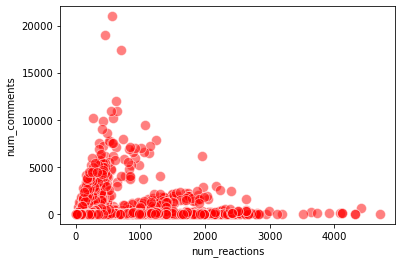

In [34]:
sns.scatterplot(x="num_reactions", y="num_comments", data=datafb_x, s=100, color="red", alpha=0.5)

In [35]:
x_array =  np.array(datafb_x)
print(x_array)

[[529 512]
 [150   0]
 [227 236]
 ...
 [  2   0]
 [351  12]
 [ 17   0]]


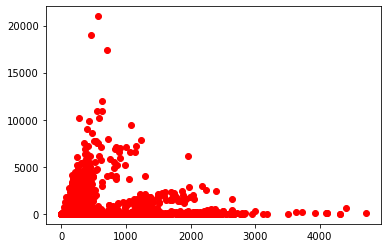

In [36]:
plt.plot(x_array[:,0], x_array[:,1],'ro')

In [37]:
kmeans = KMeans(n_clusters=5)

In [38]:
kmeans.fit(x_array)

KMeans(n_clusters=5)

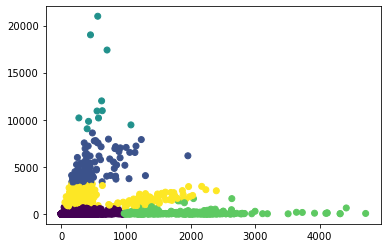

In [39]:
plt.scatter(x_array[:,0],x_array[:,1],c=kmeans.labels_,marker='o')
plt.show()

In [40]:
kmeans = KMeans(n_clusters=10)

In [41]:
kmeans.fit(x_array)

KMeans(n_clusters=10)

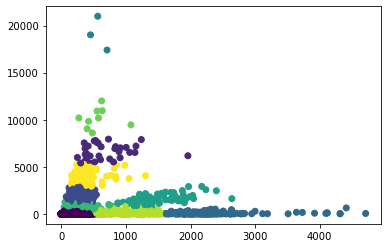

In [42]:
plt.scatter(x_array[:,0],x_array[:,1],c=kmeans.labels_,marker='o')
plt.show()

In [17]:
kmeans = KMeans(n_clusters=15)

In [18]:
kmeans.fit(x_array)

KMeans(n_clusters=15)

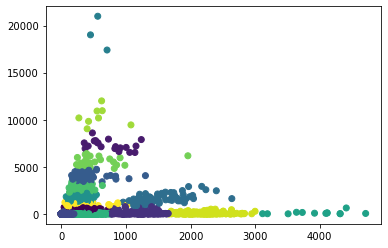

In [19]:
plt.scatter(x_array[:,0],x_array[:,1],c=kmeans.labels_,marker='o')
plt.show()

In [43]:
#menampilkan hasil kluster dan tambahkan kolom Cluster kedalam data frame
print(kmeans.labels_)
datafb_x["Cluster"] = kmeans.labels_
datafb_x.head()

[6 0 0 ... 0 0 0]


,num_reactions,num_comments,Cluster
0,529,512,6
1,150,0,0
2,227,236,0
3,111,0,0
4,213,0,0


In [44]:
print("\033[1m"+"Jumlah Data pada Cluster 0)")
datafb_x[datafb_x['Cluster'] == 0].count()

Jumlah Data pada Cluster 0)


num_reactions    5617
num_comments     5617
Cluster          5617
dtype: int64

In [48]:
#Jumlah Data pada cluster=1
print("\033[1m"+"Jumlah Data pada Cluster 1")
datafb_x[datafb_x['Cluster'] == 1].count()

Jumlah Data pada Cluster 1


num_reactions    36
num_comments     36
Cluster          36
dtype: int64

In [49]:
print("\033[1m"+"Jumlah Data pada Cluster 2")
datafb_x[datafb_x['Cluster'] == 2].count()

Jumlah Data pada Cluster 2


num_reactions    140
num_comments     140
Cluster          140
dtype: int64

In [50]:
print("\033[1m"+"Jumlah Data pada Cluster 3")
datafb_x[datafb_x['Cluster'] == 3].count()

Jumlah Data pada Cluster 3


num_reactions    210
num_comments     210
Cluster          210
dtype: int64

In [51]:
#Jumlah Data pada cluster=4
print("\033[1m"+"Jumlah Data pada Cluster 4")
datafb_x[datafb_x['Cluster'] == 4].count()

Jumlah Data pada Cluster 4


num_reactions    3
num_comments     3
Cluster          3
dtype: int64

Visualisasi Clustering (K=5)


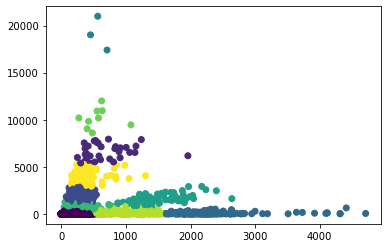

In [52]:
print("\033[1m"+"Visualisasi Clustering (K=5)")
plt.scatter(x_array[:,0],x_array[:,1], c=kmeans.labels_, marker='o')
plt.show()

In [53]:
#Clustering dengan K=10
kmeans = KMeans (n_clusters=10)
kmeans.fit (x_array)

KMeans(n_clusters=10)

In [55]:
#mencari nilai pusat dari masing masing klaster (K=10)
print(kmeans.cluster_centers_)

[[9.43802168e+02 5.66531165e+01]
 [4.04105263e+02 4.16813158e+03]
 [1.47559302e+03 1.54680233e+03]
 [2.26682857e+03 5.95571429e+01]
 [5.74666667e+02 1.91356667e+04]
 [2.36101594e+02 7.16956175e+02]
 [2.77431655e+02 1.95208633e+03]
 [7.01125000e+02 6.65268750e+03]
 [8.07485775e+01 1.88047653e+01]
 [5.60000000e+02 1.01324444e+04]]


In [56]:
print (kmeans.labels_)
datafb_x ["Cluster"] = kmeans. labels_
datafb_x.head()

[5 8 8 ... 8 8 8]


,num_reactions,num_comments,Cluster
0,529,512,5
1,150,0,8
2,227,236,8
3,111,0,8
4,213,0,8


In [57]:
#Jumlah Data pada cluster=0
print("\033[1m"+"Jumlah Data pada Cluster 0")
datafb_x[datafb_x['Cluster'] == 0].count()

Jumlah Data pada Cluster 0


num_reactions    368
num_comments     368
Cluster          368
dtype: int64

In [58]:
#Jumlah Data pada cluster=1
print("\033[1m"+"Jumlah Data pada Cluster 1")
datafb_x[datafb_x['Cluster'] == 1].count()

Jumlah Data pada Cluster 1


num_reactions    76
num_comments     76
Cluster          76
dtype: int64

In [59]:
#Jumlah Data pada cluster=2
print("\033[1m"+"Jumlah Data pada Cluster 2")
datafb_x[datafb_x['Cluster'] == 2].count()

Jumlah Data pada Cluster 2


num_reactions    86
num_comments     86
Cluster          86
dtype: int64

In [60]:
#Jumlah Data pada cluster=3
print("\033[1m"+"Jumlah Data pada Cluster 3")
datafb_x[datafb_x['Cluster'] == 3].count()

Jumlah Data pada Cluster 3


num_reactions    210
num_comments     210
Cluster          210
dtype: int64

In [61]:
#Jumlah Data pada cluster=4
print("\033[1m"+"Jumlah Data pada Cluster 4")
datafb_x[datafb_x['Cluster'] == 4].count()

Jumlah Data pada Cluster 4


num_reactions    3
num_comments     3
Cluster          3
dtype: int64

In [62]:
print("\033[1m"+"Jumlah Data pada Cluster 5")
datafb_x[datafb_x['Cluster'] == 5].count()

Jumlah Data pada Cluster 5


num_reactions    504
num_comments     504
Cluster          504
dtype: int64

In [63]:
#Jumlah Data pada cluster=6
print("\033[1m"+"Jumlah Data pada Cluster 6")
datafb_x[datafb_x['Cluster'] == 6].count()

Jumlah Data pada Cluster 6


num_reactions    140
num_comments     140
Cluster          140
dtype: int64

In [64]:
print("\033[1m"+"Jumlah Data pada Cluster 7")
datafb_x[datafb_x['Cluster'] == 7].count()

Jumlah Data pada Cluster 7


num_reactions    32
num_comments     32
Cluster          32
dtype: int64

In [65]:
#Jumlah Data pada cluster=8
print("\033[1m"+"Jumlah Data pada Cluster 8")
datafb_x[datafb_x['Cluster'] == 8].count()

Jumlah Data pada Cluster 8


num_reactions    5622
num_comments     5622
Cluster          5622
dtype: int64

In [66]:
print("\033[1m"+"Jumlah Data pada Cluster 9")
datafb_x[datafb_x['Cluster'] == 9].count()


Jumlah Data pada Cluster 9


num_reactions    9
num_comments     9
Cluster          9
dtype: int64

Visualisasi Clustering (K=10)


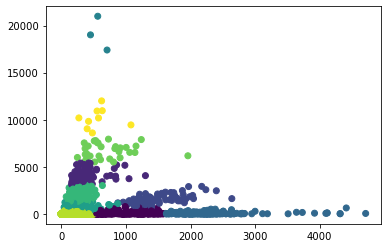

In [67]:
#visualisasi hasil clustering dengan K=10
print("\033[1m"+"Visualisasi Clustering (K=10)")
plt.scatter(x_array[:,0],x_array[:,1],c=kmeans.labels_, marker='o')
plt.show()

In [68]:
#Clustering dengan K=15
kmeans = KMeans (n_clusters=15)
kmeans.fit (x_array)

KMeans(n_clusters=15)

In [69]:
#mencari nilai pusat dari masing masing klaster (K=15)
print(kmeans.cluster_centers_)

[[4.50234310e+01 7.49058577e+00]
 [4.97966667e+02 5.30376667e+03]
 [1.15830894e+03 7.25894309e+01]
 [5.74666667e+02 1.91356667e+04]
 [3.00386364e+02 2.71050000e+03]
 [5.69875000e+02 1.03238750e+04]
 [2.18425668e+03 5.76417112e+01]
 [2.63965066e+02 9.71340611e+02]
 [3.89096154e+02 3.94778846e+03]
 [1.49070732e+03 1.57795122e+03]
 [3.63609787e+02 2.60188206e+01]
 [1.99938326e+02 4.17740088e+02]
 [3.93653846e+03 1.12538462e+02]
 [7.69454545e+02 7.17436364e+03]
 [2.68776699e+02 1.67079612e+03]]


In [70]:
#Menampilkan hasil kluster  dan tambahkan kolom Cluster kedalam data frame.
print (kmeans.labels_)
datafb_x ["Cluster"] = kmeans. labels_
datafb_x.head()

[11  0 11 ...  0 10  0]


,num_reactions,num_comments,Cluster
0,529,512,11
1,150,0,0
2,227,236,11
3,111,0,0
4,213,0,10


In [71]:
#Jumlah Data pada cluster=0
print("\033[1m"+"Jumlah Data pada Cluster 0")
datafb_x[datafb_x['Cluster'] == 0].count()

Jumlah Data pada Cluster 0


num_reactions    4780
num_comments     4780
Cluster          4780
dtype: int64

In [72]:
#Jumlah Data pada cluster=1
print("\033[1m"+"Jumlah Data pada Cluster 1")
datafb_x[datafb_x['Cluster'] == 1].count()

Jumlah Data pada Cluster 1


num_reactions    30
num_comments     30
Cluster          30
dtype: int64

In [73]:
#Jumlah Data pada cluster=2
print("\033[1m"+"Jumlah Data pada Cluster 2")
datafb_x[datafb_x['Cluster'] == 2].count()

Jumlah Data pada Cluster 2


num_reactions    246
num_comments     246
Cluster          246
dtype: int64

In [74]:
#Jumlah Data pada cluster=3
print("\033[1m"+"Jumlah Data pada Cluster 3")
datafb_x[datafb_x['Cluster'] == 3].count()

Jumlah Data pada Cluster 3


num_reactions    3
num_comments     3
Cluster          3
dtype: int64

In [75]:
#Jumlah Data pada cluster=4
print("\033[1m"+"Jumlah Data pada Cluster 4")
datafb_x[datafb_x['Cluster'] == 4].count()

Jumlah Data pada Cluster 4


num_reactions    44
num_comments     44
Cluster          44
dtype: int64

In [76]:
#Jumlah Data pada cluster=5
print("\033[1m"+"Jumlah Data pada Cluster 5")
datafb_x[datafb_x['Cluster'] == 5].count()

Jumlah Data pada Cluster 5


num_reactions    8
num_comments     8
Cluster          8
dtype: int64

In [77]:
#Jumlah Data pada cluster=6
print("\033[1m"+"Jumlah Data pada Cluster 6")
datafb_x[datafb_x['Cluster'] == 6].count()

Jumlah Data pada Cluster 6


num_reactions    187
num_comments     187
Cluster          187
dtype: int64

In [78]:
#Jumlah Data pada cluster=7
print("\033[1m"+"Jumlah Data pada Cluster 7")
datafb_x[datafb_x['Cluster'] == 7].count()

Jumlah Data pada Cluster 7


num_reactions    230
num_comments     230
Cluster          230
dtype: int64

In [79]:
#Jumlah Data pada cluster=8
print("\033[1m"+"Jumlah Data pada Cluster 8")
datafb_x[datafb_x['Cluster'] == 8].count()

Jumlah Data pada Cluster 8


num_reactions    52
num_comments     52
Cluster          52
dtype: int64

In [80]:
#Jumlah Data pada cluster=9
print("\033[1m"+"Jumlah Data pada Cluster 9")
datafb_x[datafb_x['Cluster'] == 9].count()

Jumlah Data pada Cluster 9


num_reactions    82
num_comments     82
Cluster          82
dtype: int64

In [81]:
#Jumlah Data pada cluster=10
print("\033[1m"+"Jumlah Data pada Cluster 10")
datafb_x[datafb_x['Cluster'] == 10].count()

Jumlah Data pada Cluster 10


num_reactions    797
num_comments     797
Cluster          797
dtype: int64

In [82]:
#Jumlah Data pada cluster=11
print("\033[1m"+"Jumlah Data pada Cluster 11")
datafb_x[datafb_x['Cluster'] == 11].count()

Jumlah Data pada Cluster 11


num_reactions    454
num_comments     454
Cluster          454
dtype: int64

In [83]:
#Jumlah Data pada cluster=12
print("\033[1m"+"Jumlah Data pada Cluster 12")
datafb_x[datafb_x['Cluster'] == 12].count()

Jumlah Data pada Cluster 12


num_reactions    13
num_comments     13
Cluster          13
dtype: int64

In [84]:
#Jumlah Data pada cluster=13
print("\033[1m"+"Jumlah Data pada Cluster 13")
datafb_x[datafb_x['Cluster'] == 13].count()

Jumlah Data pada Cluster 13


num_reactions    22
num_comments     22
Cluster          22
dtype: int64

In [85]:
#Jumlah Data pada cluster=14
print("\033[1m"+"Jumlah Data pada Cluster 14")
datafb_x[datafb_x['Cluster'] == 14].count()

Jumlah Data pada Cluster 14


num_reactions    102
num_comments     102
Cluster          102
dtype: int64

Visualisasi Clustering (K=15)


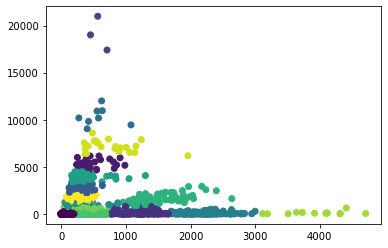

In [86]:
#visualisasi hasil clustering dengan K=15
print("\033[1m"+"Visualisasi Clustering (K=15)")
plt.scatter(x_array[:,0],x_array[:,1],c=kmeans.labels_, marker='o')
plt.show()